Importing Libraries

In [2]:
import numpy as np
import pandas as pd

In [5]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


Reading Data Set

In [6]:
import io
iris = pd.read_csv(io.BytesIO(uploaded['IRIS.csv']))
print(iris)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


Exploratary Data Analysis

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
iris.shape

(150, 5)

In [10]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris.isnull().value_counts()

sepal_length  sepal_width  petal_length  petal_width  species
False         False        False         False        False      150
dtype: int64

Data Preprocessing

In [13]:
#create a column withe int values for species columns
iris['iris_code'] = iris['species'].map({'Iris-setosa':0 ,'Iris-versicolor':1,'Iris-virginica':2}).astype(int)

In [14]:
# making dataframe on the basis of  species
ir0 = iris[iris.iris_code ==0] #Iris-setosa
ir1 = iris[iris.iris_code ==1] # Iris-versicolor
ir2 = iris[iris.iris_code ==2] # Iris-Virgiinica

Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

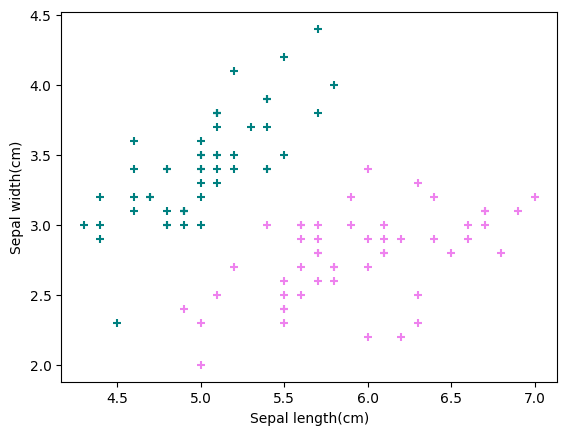

In [18]:
# scatter plot with sepal length and sepal width comparision
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')
plt.scatter(ir0['sepal_length'],ir0['sepal_width'],color='teal',marker='+')
plt.scatter(ir1['sepal_length'],ir1['sepal_width'],color='violet',marker='+')

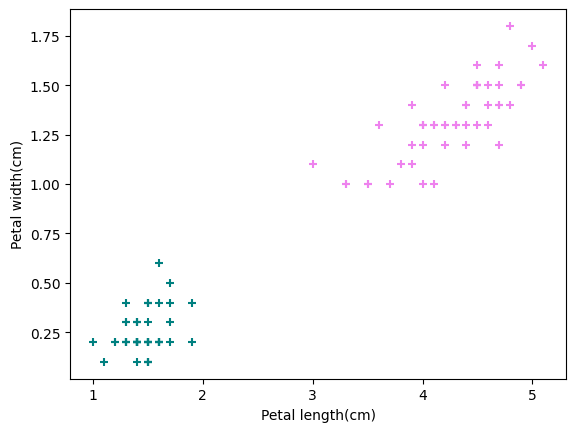

In [19]:
# comparision b/w Petal length and petal width
plt.xlabel('Petal length(cm)')
plt.ylabel('Petal width(cm)')
plt.scatter(ir0['petal_length'],ir0['petal_width'],color='teal',marker='+')
plt.scatter(ir1['petal_length'],ir1['petal_width'],color='violet',marker='+')

Model Selection

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#drop columns for model
x= iris.drop(['species','iris_code'],axis='columns')
y= iris.iris_code

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [23]:
from sklearn.svm import SVC

In [24]:
model = SVC()

In [25]:
model.fit(x_train,y_train)

SVC()

In [26]:
model.score(x_test,y_test)

0.9666666666666667